In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [20]:
data = pd.read_csv('clean_data_p1.csv')
data

,Make,Car_Name,CC_Capacity,Horsepower,Top_Speed_kmh,Acceleration_0_100_sec,Price_USD,Seats,Torque_Nm,Engine_Layout,Fuel_Type_Cleaned
0,FERRARI,Sf90 Stradale,3990.0,963.0,340.0,2.5,1.100000e+06,2,800.0,V-type,Hybrid
1,ROLLS ROYCE,Phantom,6749.0,563.0,250.0,5.3,4.600000e+05,5,900.0,V-type,Petrol
2,FORD,Ka+,1200.0,77.5,165.0,10.5,1.350000e+04,5,120.0,Inline,Petrol
3,MERCEDES,Gt 63 S,3982.0,630.0,250.0,3.2,1.610000e+05,4,900.0,V-type,Petrol
4,AUDI,Audi R8 Gt,5204.0,602.0,320.0,3.6,2.532900e+05,2,560.0,V-type,Petrol
...,...,...,...,...,...,...,...,...,...,...,...
1208,TOYOTA,Crown Signia,2487.0,240.0,180.0,7.6,4.359048e+09,5,239.0,Hybrid (ICE+Electric),Hybrid
1209,TOYOTA,4Runner (6Th Gen),2393.0,326.0,180.0,6.8,5.000000e+04,7,630.0,Hybrid (ICE+Electric),Hybrid
1210,TOYOTA,Corolla Cross,1987.0,169196.0,190.0,NaN,2.521029e+09,5,190210.0,Hybrid (ICE+Electric),Hybrid
1211,TOYOTA,C-Hr+,NaN,140198.0,180.0,NaN,3.300000e+04,5,190205.0,Hybrid (ICE+Electric),Hybrid


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    1213 non-null   object 
 1   Car_Name                1213 non-null   object 
 2   CC_Capacity             1082 non-null   float64
 3   Horsepower              1213 non-null   float64
 4   Top_Speed_kmh           1213 non-null   float64
 5   Acceleration_0_100_sec  1198 non-null   float64
 6   Price_USD               1212 non-null   float64
 7   Seats                   1213 non-null   int64  
 8   Torque_Nm               1212 non-null   float64
 9   Engine_Layout           1213 non-null   object 
 10  Fuel_Type_Cleaned       1213 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 104.4+ KB


## Check missing value

In [35]:
(data.isnull().sum()/ len(data)) * 100

Make                       0.000000
Car_Name                   0.000000
CC_Capacity               10.799670
Horsepower                 0.000000
Top_Speed_kmh              0.000000
Acceleration_0_100_sec     1.236603
Price_USD                  0.082440
Seats                      0.000000
Torque_Nm                  0.082440
Engine_Layout              0.000000
Fuel_Type_Cleaned          0.000000
dtype: float64

#### The percentage of mising values for the columns CC_Capacity and Accleration is 10.8% and 1.23% respectively

## Clarify feature


### Quantitative Classification and Qualitatice classification

In [26]:
data.describe()

,CC_Capacity,Horsepower,Top_Speed_kmh,Acceleration_0_100_sec,Price_USD,Seats,Torque_Nm
count,1082.000000,1213.000000,1213.000000,1198.000000,1.212000e+03,1213.000000,1212.000000
mean,3016.797597,1072.016488,216.624073,7.566861,1.274576e+07,5.329761,1738.260726
std,1836.777382,11913.403265,53.056640,3.325846,2.295682e+08,8.938555,16937.145753
min,360.000000,26.000000,80.000000,1.900000,4.000000e+03,1.000000,45.000000
25%,1600.000000,155.000000,180.000000,5.200000,2.800000e+04,4.000000,250.000000
50%,2483.500000,255.500000,200.000000,7.100000,4.300000e+04,5.000000,380.000000
75%,3745.000000,400.000000,250.000000,9.500000,7.112625e+04,5.000000,565.000000
max,16100.000000,250340.000000,500.000000,35.000000,5.500065e+09,215.000000,365480.000000


In [38]:
#Note:
"""
ghế ngồi có vấn đề: thông thường xe phải trên dưới 2 chỗ ngồi, không thể tới tận 215 chỗ
mã lực: có vài vấn đề. Min thì là 26hp, nhưng max tới tận 250340hp. có thể do nhập liệu sai
tương tự với torque ( mô men xoắn)
giá xe ô tô có vấn đề: khi siêu xe mới hiện tại cũng chỉ 30 triệu đô nhưng xe max thì tới tận 550 triệu USD
cột Top_speed_km/h có vẻ khá là đúng, phù hợp với thực tế
cột cc_capacity có khả năng outlier ( vì dung tích tận 16 lít, quá cao so với xe phổ thông. Chỉ dành cho xe container)

    
    
"""

'\nghế ngồi có vấn đề: thông thường xe phải trên dưới 2 chỗ ngồi, không thể tới tận 215 chỗ\nmã lực: có vài vấn đề. Min thì là 26hp, nhưng max tới tận 250340hp. có thể do nhập liệu sai\ntương tự với torque ( mô men xoắn)\ngiá xe ô tô có vấn đề: khi siêu xe mới hiện tại cũng chỉ 30 triệu đô nhưng xe max thì tới tận 550 triệu USD\ncột Top_speed_km/h có vẻ khá là đúng, phù hợp với thực tế\ncột cc_capacity có khả năng outlier ( vì dung tích tận 16 lít, quá cao so với xe phổ thông. Chỉ dành cho xe container)\n\n    \n    \n'

In [28]:
quantitative_columns = []
qualitative_columns = []
for col in data:
    if data[col].dtype == 'float64' or data[col].dtype == 'int64':
        quantitative_columns.append(col) # ratio hết
    else:
        qualitative_columns.append(col) # này là dạng nominal hết
        

In [29]:
print(qualitative_columns) 

['Make', 'Car_Name', 'Engine_Layout', 'Fuel_Type_Cleaned']


In [30]:
print(quantitative_columns)

['CC_Capacity', 'Horsepower', 'Top_Speed_kmh', 'Acceleration_0_100_sec', 'Price_USD', 'Seats', 'Torque_Nm']


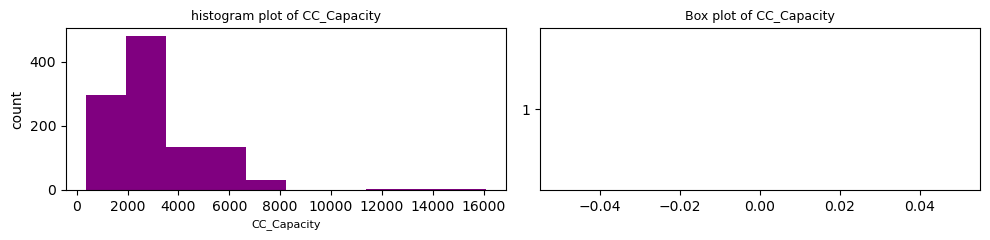

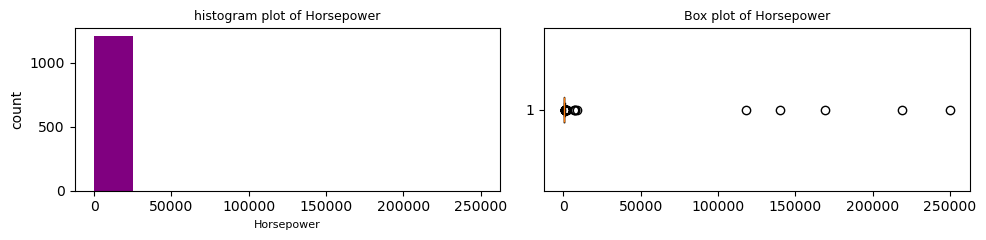

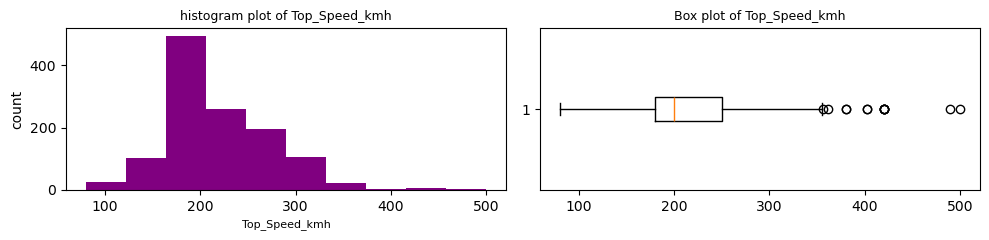

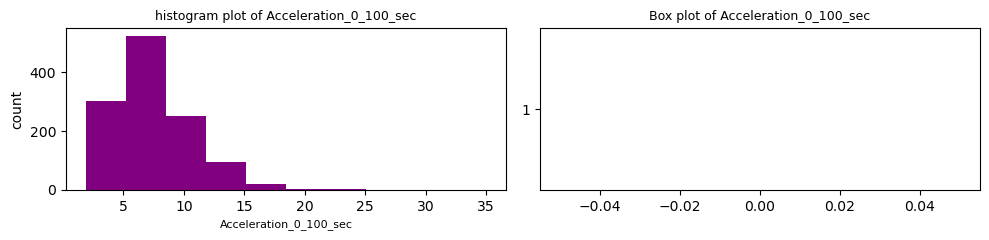

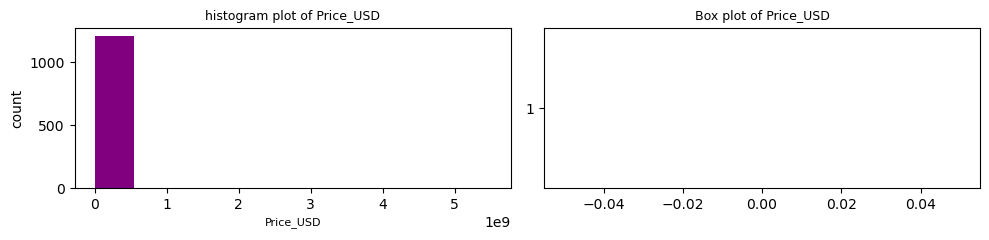

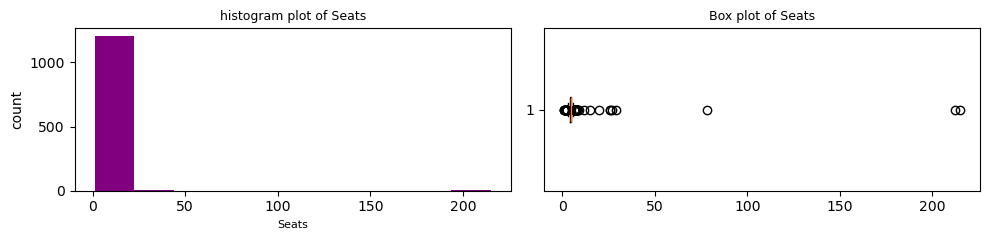

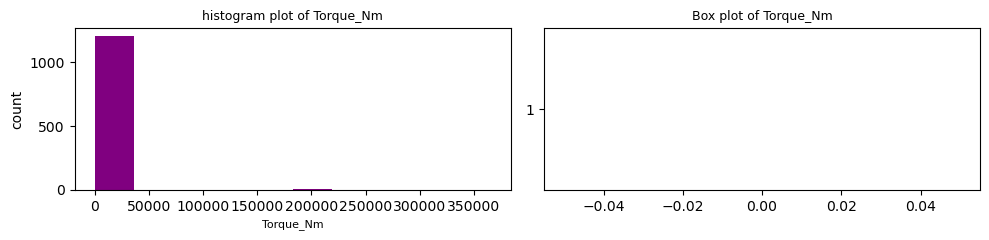

In [37]:
for col in quantitative_columns:
    plt.figure(figsize= (10, 2.5))
    #histogram plot:
    plt.subplot(1, 2, 1) 
    plt.hist(data[col], color = "purple")
    plt.title(f"histogram plot of {col}", fontsize = 9)
    plt.xlabel(col, fontsize = 8)
    plt.ylabel("count")

    #box plot
    plt.subplot(1,2, 2)
    plt.boxplot(x = data[col], vert = False)
    plt.title(f"Box plot of {col}", fontsize = 9)
    plt.tight_layout()
    plt.show()

In [32]:
## 1. Kiểm tra và xử lý Missing Values

### Explore outlier 

In [59]:
def find_iqr_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"(Lower Bound): {lower_bound:,.2f}")
    print(f"(Upper Bound): {upper_bound:,.2f}")
    print(f" Outlier : {len(outliers)}")
    print(f'percent on columns: {len(outliers)/ len(data[col])}')
    print("------------------------------------------")
    return outliers
    

In [60]:
for col in quantitative_columns:
    print(f"{col} info:")
    outlierr = find_iqr_outliers(data, col)
    print()
    

CC_Capacity info:
(Lower Bound): -1,617.50
(Upper Bound): 6,962.50
 Outlier : 20
percent on columns: 0.016488046166529265
------------------------------------------

Horsepower info:
(Lower Bound): -212.50
(Upper Bound): 767.50
 Outlier : 39
percent on columns: 0.03215169002473207
------------------------------------------

Top_Speed_kmh info:
(Lower Bound): 75.00
(Upper Bound): 355.00
 Outlier : 13
percent on columns: 0.010717230008244023
------------------------------------------

Acceleration_0_100_sec info:
(Lower Bound): -1.25
(Upper Bound): 15.95
 Outlier : 23
percent on columns: 0.018961253091508656
------------------------------------------

Price_USD info:
(Lower Bound): -36,689.38
(Upper Bound): 135,815.62
 Outlier : 151
percent on columns: 0.12448474855729597
------------------------------------------

Seats info:
(Lower Bound): 2.50
(Upper Bound): 6.50
 Outlier : 325
percent on columns: 0.2679307502061006
------------------------------------------

Torque_Nm info:
(Lower Bo